In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [31]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sS = pd.read_csv("sampleSubmission.csv")
train['推薦類型'].replace(['肌力',"柔軟度","心肺","肌耐力","error","錯誤","無此類別"],[0,1,2,3,np.nan,np.nan,np.nan] , inplace = True)

In [32]:
train = train.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
train['推薦類型'] = train['推薦類型'].astype('int64')

<AxesSubplot:>

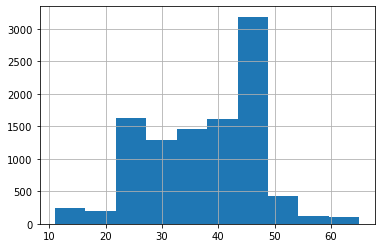

In [33]:
age = 70
out_age = train.query("年齡 > @age")
out_age_list =out_age.index.tolist()
train = train.drop(out_age_list)
train["年齡"].hist()

In [48]:
BMI = 9
out_BMI = train.query("BMI < @BMI")
out_BMI

,性別,年齡,BMI,拳擊,器材,有氧,舞蹈,高強度間歇,瑜伽,肌力訓練,燃脂,減脂瘦身,增加肌肉,增強體魄,舒緩壓力,推薦類型


<AxesSubplot:>

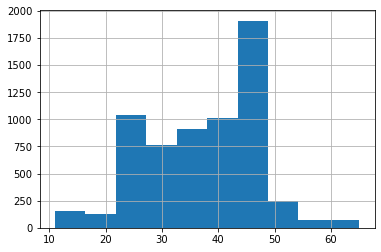

In [35]:
out_BMI["年齡"].hist()

<AxesSubplot:>

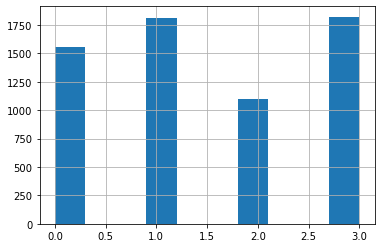

In [36]:
out_BMI["推薦類型"].hist()

<AxesSubplot:>

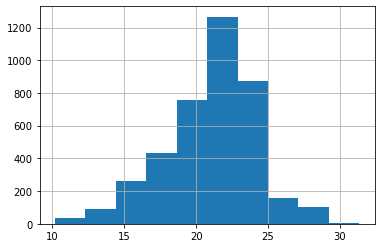

In [37]:
out_BMI_list =out_BMI.index.tolist()
train = train.drop(out_BMI_list)
train["BMI"].hist()

<AxesSubplot:>

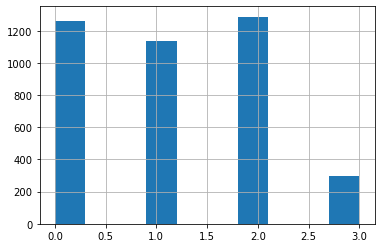

In [38]:
train["推薦類型"].hist()

In [39]:
y = 1
n = 0

out1 = train.query("拳擊 > @y ")
outlist1 =out1.index.tolist()
train = train.drop(outlist1)

out2 = train.query("拳擊 < @n ")
outlist2 =out2.index.tolist()
train = train.drop(outlist2)

out3 = train.query("器材 > @y ")
outlist3 =out3.index.tolist()
train = train.drop(outlist3)
out4 = train.query("器材 < @n ")
outlist4 =out4.index.tolist()
train = train.drop(outlist4)

out3 = train.query("有氧 > @y ")
outlist3 =out3.index.tolist()
train = train.drop(outlist3)
out4 = train.query("有氧 < @n ")
outlist4 =out4.index.tolist()
train = train.drop(outlist4)

out3 = train.query("舞蹈 > @y ")
outlist3 =out3.index.tolist()
train = train.drop(outlist3)
out4 = train.query("舞蹈 < @n ")
outlist4 =out4.index.tolist()
train = train.drop(outlist4)

out3 = train.query("高強度間歇 > @y ")
outlist3 =out3.index.tolist()
train = train.drop(outlist3)
out4 = train.query("高強度間歇 < @n ")
outlist4 =out4.index.tolist()
train = train.drop(outlist4)

out3 = train.query("瑜伽 > @y ")
outlist3 =out3.index.tolist()
train = train.drop(outlist3)
out4 = train.query("瑜伽 < @n ")
outlist4 =out4.index.tolist()
train = train.drop(outlist4)

out3 = train.query("肌力訓練 > @y ")
outlist3 =out3.index.tolist()
train = train.drop(outlist3)
out4 = train.query("肌力訓練 < @n ")
outlist4 =out4.index.tolist()
train = train.drop(outlist4)

out3 = train.query("燃脂 > @y ")
outlist3 =out3.index.tolist()
train = train.drop(outlist3)
out4 = train.query("燃脂 < @n ")
outlist4 =out4.index.tolist()
train = train.drop(outlist4)

out3 = train.query("減脂瘦身 > @y ")
outlist3 =out3.index.tolist()
train = train.drop(outlist3)
out4 = train.query("減脂瘦身 < @n ")
outlist4 =out4.index.tolist()
train = train.drop(outlist4)

out3 = train.query("增加肌肉 > @y ")
outlist3 =out3.index.tolist()
train = train.drop(outlist3)
out4 = train.query("增加肌肉 < @n ")
outlist4 =out4.index.tolist()
train = train.drop(outlist4)

out3 = train.query("增強體魄 > @y ")
outlist3 =out3.index.tolist()
train = train.drop(outlist3)
out4 = train.query("增強體魄 < @n ")
outlist4 =out4.index.tolist()
train = train.drop(outlist4)

out3 = train.query("舒緩壓力 > @y ")
outlist3 =out3.index.tolist()
train = train.drop(outlist3)
out4 = train.query("舒緩壓力 < @n ")
outlist4 =out4.index.tolist()
train = train.drop(outlist4)

In [40]:
X = train.drop(["推薦類型"], axis =1)
y = train["推薦類型"]

<AxesSubplot:>

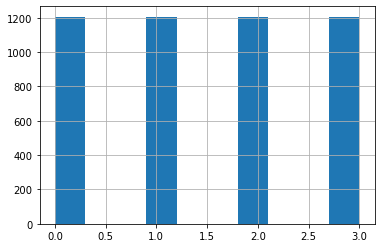

In [41]:
from imblearn.over_sampling import SMOTE
X, y = SMOTE().fit_resample(X,y)
y.hist()


In [42]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
import xgboost as xgb
from sklearn.model_selection import train_test_split,GridSearchCV
X_train, X_val, y_train, y_val = train_test_split(
   X, y, test_size=0.33, random_state=42)

In [43]:
xg1 = XGBClassifier(n_estimators= 200, max_depth = 8)
xg1=xg1.fit(X_train, y_train)
print(xg1.score(X_train,y_train))
xg1.score(X_val,y_val)

C:\Users\KYLE\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:40:39] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.9913366336633663


0.8291457286432161

In [15]:
xg= XGBClassifier()
n_estimators = np.arange(400,900,100).tolist()
max_depth = [4,6,8,10,12]
learning_rate = [0.1,0.15,0.2,0.25]
XG_param = {'n_estimators': n_estimators,
                "max_depth": max_depth,
                "learning_rate": learning_rate}
XGCV = GridSearchCV(xg,param_grid=XG_param,cv=5)
XGCV.fit(X_train,y_train)

In [16]:
print("accuracy score",XGCV.score(X_val,y_val))
print("The best model param :",XGCV.best_params_)

accuracy score 0.8407523510971787
The best model param : {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 500}


In [44]:
xg1 = XGBClassifier(n_estimators= 500, max_depth = 8,learning_rate = 0.1)
xg1=xg1.fit(X_train, y_train)

C:\Users\KYLE\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:41:07] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [45]:
y_pred = xg1.predict(test)
y_pred_pd = pd.DataFrame(data = y_pred, columns = ["label"])
y_pred_pd = y_pred_pd.astype('int64').reset_index()
y_pred_pd
y_pred_pd.to_csv("e94084032.csv", index = False)

In [46]:
from sklearn.ensemble import RandomForestClassifier
randomForestModel = RandomForestClassifier(random_state = 42, n_estimators= 500,max_features = 8,  max_depth= 14)
randomForestModel.fit(X, y)
scores = cross_val_score(randomForestModel,X,y,cv = 7,scoring = 'accuracy')
scores.mean()

0.8478543332522005

In [47]:
y_pred = randomForestModel.predict(test)
y_pred_pd = pd.DataFrame(data = y_pred, columns = ["label"])
y_pred_pd = y_pred_pd.astype('int64').reset_index()
y_pred_pd
y_pred_pd.to_csv("e94084032.csv", index = False)

In [24]:
 RF_param = {"n_estimators":[50,100,150,200],"max_depth":[5,10,15,20],"max_features" : [6,8,10,12,14]}

In [25]:
#RF = RandomForestClassifier()
#GSCV = GridSearchCV(RF,param_grid=RF_param,cv=5)
#GSCV.fit(X_train,y_train)
#print("accuracy score",GSCV.score(X_val,y_val))
#print("The best model param :",GSCV.best_params_)

In [29]:
RF = RandomForestClassifier(n_estimators = 50,max_features =8 ,max_depth = 15)
RF.fit(X_train,y_train)
RF.feature_importances_
#y_pred = RF.predict(test)
#y_pred_pd = pd.DataFrame(data = y_pred, columns = ["label"])
#y_pred_pd = y_pred_pd.astype('int64').reset_index()
#y_pred_pd
#y_pred_pd.to_csv("e94084032.csv", index = False)

array([0.04187972, 0.26520347, 0.18266165, 0.09236926, 0.03104008,
       0.03084996, 0.03293833, 0.02168412, 0.05457245, 0.07941019,
       0.03096084, 0.03429147, 0.04240484, 0.02590319, 0.03383044])

In [22]:
#from sklearn.preprocessing import OneHotEncoder
#onehotencoder = OneHotEncoder(categories = 'auto')
#from sklearn.compose import ColumnTransformer
#Encode Country Column
#ct = ColumnTransformer([("性別", OneHotEncoder(), [0])], remainder = 'passthrough')
#train_one_hot = ct.fit_transform(train)

In [23]:
cor = train.corr(method='pearson')

C:\Users\KYLE\AppData\Local\Temp/ipykernel_19900/2650377446.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(cor, mask=np.zeros_like(cor, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
C:\Users\KYLE\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 24615 (\N{CJK UNIFIED IDEOGRAPH-6027}) missing from current font.
  fig.canvas.draw()
C:\Users\KYLE\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 21029 (\N{CJK UNIFIED IDEOGRAPH-5225}) missing from current font.
  fig.canvas.draw()
C:\Users\KYLE\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 24180 (\N{CJK UNIFIED IDEOGRAPH-5E74}

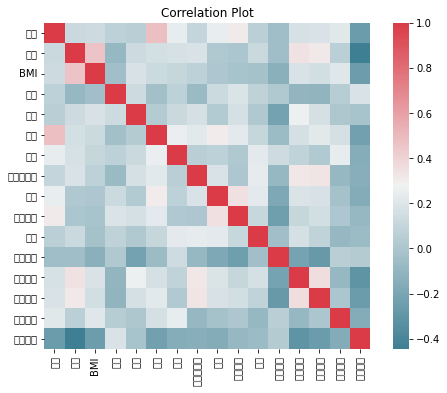

,性別,年齡,BMI,拳擊,器材,有氧,舞蹈,高強度間歇,瑜伽,肌力訓練,燃脂,減脂瘦身,增加肌肉,增強體魄,舒緩壓力,推薦類型
性別,1.000000,0.120348,0.135483,0.074124,0.056526,0.470398,0.242293,0.097246,0.248716,0.309378,0.061721,-0.052828,0.173401,0.183507,0.211119,-0.260476
年齡,0.120348,1.000000,0.462058,-0.085205,0.131848,0.154592,0.174156,0.185277,0.015854,-0.002162,0.120251,-0.044781,0.344214,0.315949,0.062874,-0.444565
BMI,0.135483,0.462058,1.000000,-0.038639,0.180078,0.127462,0.107251,0.072056,0.001801,-0.019192,-0.029255,-0.137518,0.182968,0.152994,0.209930,-0.256297
拳擊,0.074124,-0.085205,-0.038639,1.000000,0.133610,-0.033075,0.074496,-0.073794,0.129485,0.190077,0.075676,0.012733,-0.105148,-0.109944,0.043376,0.185328
器材,0.056526,0.131848,0.180078,0.133610,1.000000,0.032567,0.123013,0.168506,0.027348,0.161050,0.017821,-0.221999,0.264209,0.162108,0.008355,-0.018725
有氧,0.470398,0.154592,0.127462,-0.033075,0.032567,1.000000,0.251061,0.220956,0.302613,0.221467,0.106869,-0.068798,0.166079,0.217188,0.166464,-0.235475
舞蹈,0.242293,0.174156,0.107251,0.074496,0.123013,0.251061,1.000000,0.053061,0.071624,0.017194,0.223839,0.142210,0.081706,0.019835,0.238587,-0.154491
高強度間歇,0.097246,0.185277,0.072056,-0.073794,0.168506,0.220956,0.053061,1.000000,0.185063,0.002545,0.235254,-0.086193,0.319188,0.330056,-0.088315,-0.147099
瑜伽,0.248716,0.015854,0.001801,0.129485,0.027348,0.302613,0.071624,0.185063,1.000000,0.347975,0.225218,-0.184837,0.190684,0.177849,-0.030503,-0.161472
肌力訓練,0.309378,-0.002162,-0.019192,0.190077,0.161050,0.221467,0.017194,0.002545,0.347975,1.000000,0.112866,-0.244394,0.108218,0.148268,0.004350,-0.084424


In [24]:
import seaborn as sns
fig, ax =plt.subplots(figsize=(8, 6))
plt.title("Correlation Plot")
sns.heatmap(cor, mask=np.zeros_like(cor, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.show()
cor

In [25]:
train_one_hot = pd.DataFrame(train_one_hot)
train_one_hot.rename(columns = {0:'女',1:'男',2:'年齡',3:'BMI',4:'拳擊',5:'器材',6:'有氧',7:'舞蹈',8:'高強度間歇',9:'瑜伽',10:'肌力訓練',11:'燃脂',12:'減脂瘦身',13:'增加肌肉',14:'增強體魄',15:'舒緩壓力',16:'Label'})



,女,男,年齡,BMI,拳擊,器材,有氧,舞蹈,高強度間歇,瑜伽,肌力訓練,燃脂,減脂瘦身,增加肌肉,增強體魄,舒緩壓力,Label
0,0.0,1.0,47.0,22.521372,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0
1,0.0,1.0,46.0,23.161083,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0.0,1.0,43.0,22.053277,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
3,1.0,0.0,32.0,24.460388,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0
4,0.0,1.0,38.0,19.310658,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3556,1.0,0.0,46.0,21.589910,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0
3557,0.0,1.0,46.0,22.491349,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
3558,1.0,0.0,45.0,22.157158,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0
3559,0.0,1.0,26.0,14.634752,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0


In [26]:
#X_h = train_one_hot.drop([16],axis =1)
#y_h = train_one_hot[16]
#X_train, X_val, y_train, y_val = train_test_split(
#   X_h, y_h, test_size=0.33, random_state=42)
#RF = RandomForestClassifier(n_estimators = 50,max_features =8 ,max_depth = 15)
#RF.fit(X_train,y_train)

RandomForestClassifier(max_depth=15, max_features=8, n_estimators=50)

In [27]:
#test_one_hot = ct.fit_transform(test)
#test_one_hot = pd.DataFrame(test_one_hot)
#test_one_hot.rename(columns = {0:'女',1:'男',2:'年齡',3:'BMI',4:'拳擊',5:'器材',6:'有氧',7:'舞蹈',8:'高強度間歇',9:'瑜伽',10:'肌力訓練',11:'燃脂',12:'減脂瘦身',13:'增加肌肉',14:'增強體魄',15:'舒緩壓力',16:'Label'})
#y_pred = RF.predict(test_one_hot)
#y_pred_pd = pd.DataFrame(data = y_pred, columns = ["label"])
#y_pred_pd = y_pred_pd.astype('int64').reset_index()
#y_pred_pd
#y_pred_pd.to_csv("e94084032.csv", index = False)

,女,男,年齡,BMI,拳擊,器材,有氧,舞蹈,高強度間歇,瑜伽,肌力訓練,燃脂,減脂瘦身,增加肌肉,增強體魄,舒緩壓力
0,0.0,1.0,44.0,21.270529,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0
1,1.0,0.0,44.0,25.433064,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
2,0.0,1.0,31.0,18.818924,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,0.0,1.0,41.0,23.733238,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,1.0,0.0,37.0,19.073054,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5003,0.0,1.0,27.0,23.875115,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0
5004,1.0,0.0,24.0,29.558578,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
5005,1.0,0.0,37.0,19.651736,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
5006,1.0,0.0,29.0,13.231170,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0


In [28]:
#RF = RandomForestClassifier()
#GSCV = GridSearchCV(RF,param_grid=RF_param,cv=5)
#GSCV.fit(X_train,y_train)
#print("accuracy score",GSCV.score(X_val,y_val))
#print("The best model param :",GSCV.best_params_)

accuracy score 0.7763605442176871
The best model param : {'max_depth': 10, 'max_features': 6, 'n_estimators': 200}


In [30]:
#RF = RandomForestClassifier(n_estimators = 200,max_features =9 ,max_depth = 10)
#RF.fit(X_h,y_h)

RandomForestClassifier(max_depth=10, max_features=9, n_estimators=200)

In [31]:
#y_pred = RF.predict(test_one_hot)
#y_pred_pd = pd.DataFrame(data = y_pred, columns = ["label"])
#y_pred_pd = y_pred_pd.astype('int64').reset_index()
#y_pred_pd
#y_pred_pd.to_csv("e94084032.csv", index = False)

In [32]:
import xgboost as xgb
xg1 = XGBClassifier()
xg1=xg1.fit(X_train, y_train)
print(xg1.score(X_train,y_train))
xg1.score(X_val,y_val)

C:\Users\KYLE\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:14:09] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.9853249475890985


0.7712585034013606